In [3]:
#Importing necessary modules
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from capstone2_helper_functions import sl_and_le, avh, pl5y, wa, att

In [4]:
#Reading in CSV file and displaying first 5 columns after renaming columns
employee_data = pd.read_csv('HR_comma_sep.csv')
employee_data.columns = ['satisfaction_level','last_evaluation','project_number','average_monthly_hours',
                        'years_at_company','work_accidents','attrition','promotion_last_5years','department','salary']
employee_data.head()

,satisfaction_level,last_evaluation,project_number,average_monthly_hours,years_at_company,work_accidents,attrition,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


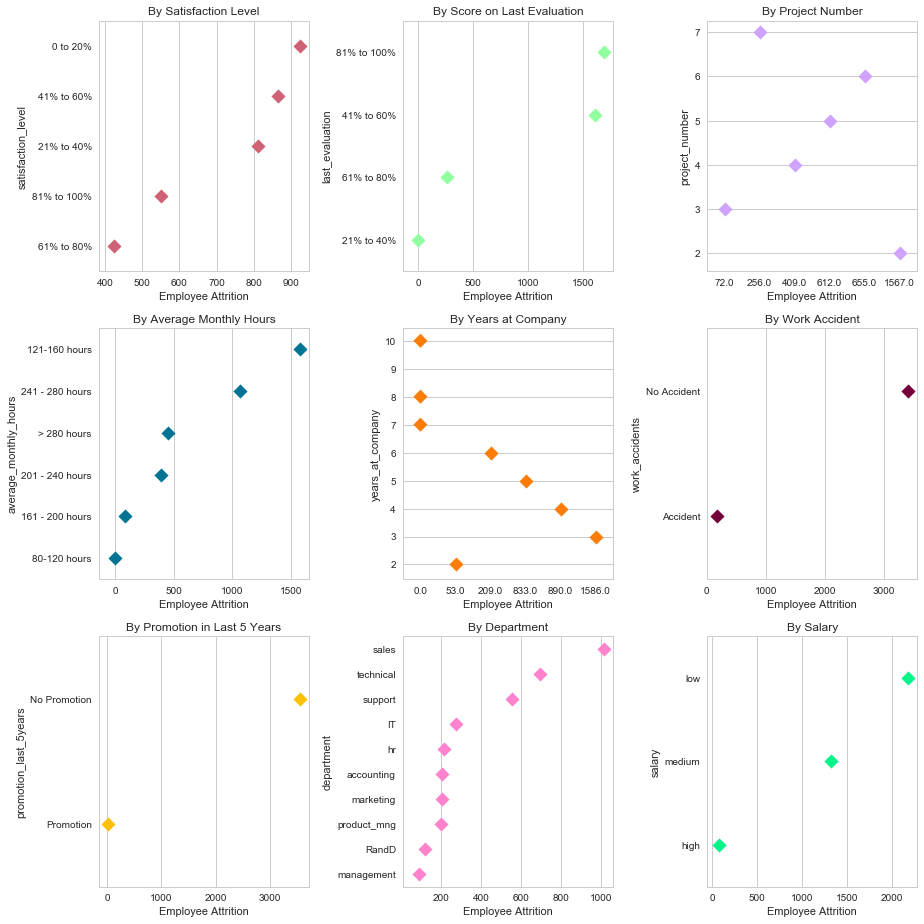

In [6]:
#This funtion groups dataframe by unique categorical variables in feature column passed as first argument, after
#converting by a helper function(optional) passed as second argument
#and aggregates by the count of binary target variable, attrition_No and attrition_Yes
def group_df(column_name,function=None)->'grouped df':
    df = employee_data.loc[:,['attrition']]
    df.loc[:,'attrition'] = df.loc[:,'attrition'].apply(att)
    df = pd.get_dummies(df)
    df_r = employee_data.loc[:,[column_name]]
    if function != None:
        df_r.loc[:,column_name] = df_r.loc[:,column_name].apply(function)
    df = df.merge(df_r,right_index=True,left_index=True)
    df = df.groupby(column_name)
    df = df[['attrition_Yes','attrition_No']].sum()
    return pd.DataFrame(df).reset_index().sort_values('attrition_Yes',ascending=False)
#Applying aformetioned function to each feature column passing in necessary arguements and helper functions 
#imported from capstone2_helper_functions module and saving returned grouped dataframes in global variables
_by_satisfaction = group_df('satisfaction_level',sl_and_le)
_by_last_evaluation = group_df('last_evaluation',sl_and_le)
_by_project_number = group_df('project_number')
_by_avg_monthly_hours = group_df('average_monthly_hours',avh)
_by_years_at_company = group_df('years_at_company')
_by_work_accident = group_df('work_accidents',wa)
_by_promotion = group_df('promotion_last_5years',pl5y)
_by_department = group_df('department')
_by_salary = group_df('salary')
#Plotting breakdown of total employee attrition by each feature variable
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(13,13))
plt.subplot(3,3,1)
sns.stripplot(x='attrition_Yes',y='satisfaction_level',data=_by_satisfaction,marker='D',size=10,color= sns.xkcd_rgb["rose"])
plt.xlabel('Employee Attrition')
plt.title('By Satisfaction Level')
plt.subplot(3,3,2)
sns.stripplot(x='attrition_Yes',y='last_evaluation',data=_by_last_evaluation,marker='D',size=10,color= sns.xkcd_rgb["mint green"])
plt.xlabel('Employee Attrition')
plt.title('By Score on Last Evaluation')
plt.subplot(3,3,3)
sns.stripplot(x='attrition_Yes',y='project_number',data=_by_project_number,marker='D',size=10,color= sns.xkcd_rgb["lilac"])
plt.xlabel('Employee Attrition')
plt.title('By Project Number')
plt.subplot(3,3,4)
sns.stripplot(x='attrition_Yes',y='average_monthly_hours',data=_by_avg_monthly_hours,marker='D',size=10,color= sns.xkcd_rgb["sea blue"])
plt.xlabel('Employee Attrition')
plt.title('By Average Monthly Hours')
plt.subplot(3,3,5)
sns.stripplot(x='attrition_Yes',y='years_at_company',data=_by_years_at_company,marker='D',size=10,color= sns.xkcd_rgb["pumpkin orange"])
plt.xlabel('Employee Attrition')
plt.title('By Years at Company')
plt.subplot(3,3,6)
sns.stripplot(x='attrition_Yes',y='work_accidents',data=_by_work_accident,marker='D',size=10,color= sns.xkcd_rgb["merlot"])
plt.xlabel('Employee Attrition')
plt.title('By Work Accident')
plt.subplot(3,3,7)
sns.stripplot(x='attrition_Yes',y='promotion_last_5years',data=_by_promotion,marker='D',size=10,color= sns.xkcd_rgb["marigold"])
plt.xlabel('Employee Attrition')
plt.title('By Promotion in Last 5 Years')
plt.subplot(3,3,8)
sns.stripplot(x='attrition_Yes',y='department',data=_by_department,marker='D',size=10,color= sns.xkcd_rgb["bubblegum pink"])
plt.xlabel('Employee Attrition')
plt.title('By Department')
plt.subplot(3,3,9)
sns.stripplot(x='attrition_Yes',y='salary',data=_by_salary,marker='D',size=10,color= sns.xkcd_rgb["turquoise green"])
plt.xlabel('Employee Attrition')
plt.title('By Salary')

plt.tight_layout()
plt.show()

## Pre-processing dataset for machine learning algorithims

### One Hot Encoding and Label Encoding appropriate columns

In [7]:
employee_data.loc[:,'salary'].replace(['high','medium','low'],[3,2,1],inplace=True)
employee_data_p = pd.get_dummies(employee_data, drop_first=True)
employee_data_p.head(5)

,satisfaction_level,last_evaluation,project_number,average_monthly_hours,years_at_company,work_accidents,attrition,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


In [8]:
#Importing necessary moduels and libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from pandas_ml import ConfusionMatrix
%matplotlib inline
#Splitting the dataset into testing and training sets
X = np.array(employee_data_p.drop(['attrition'],axis=1))
y = np.array(employee_data_p['attrition'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#ML helper function
def display_stats(model,name):
    print()
    print('-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*')
    print()
    print('Accuracy on unseen hold out set:',model.score(X_test,y_test)*100,'%')
    print()
    y_pred = model.predict(X_test)
    y_pred_s = pd.Series(y_pred).replace([0,1],['Attriton_No','Attrition_Yes'])
    y_test_s = pd.Series(y_test).replace([0,1],['Attriton_No','Attrition_Yes'])
    confusion_matrix = ConfusionMatrix(y_test_s,y_pred_s)
    confusion_matrix.plot(normalized=True,backend='seaborn')
    plt.title('Confusion Matrix For '+str(name))
    plt.show()
    print("Binary confusion matrix:\n%s" %confusion_matrix)
    print()
    print('Positive = Attriton_No(employee did not leave)')
    print('Negative = Attriton_Yes(employee left)')
    print()
    print('True Positive Rate:',confusion_matrix.TPR * 100,'%')
    print('False Positive Rate:',confusion_matrix.FPR * 100,'%')
    print('True Negative Rate:',confusion_matrix.TNR * 100,'%')
    print('False Negative Rate:',confusion_matrix.FNR * 100,'%')

## Voting Classifier

### Tuning C and Gamma for SVC

In [93]:
C_range = 10. ** np.arange(-3,1)
gamma_range = 10. ** np.arange(-4,1)
param_grid_svc = dict(gamma=gamma_range,C=C_range)
svc = SVC()
svc_cv = GridSearchCV(svc,param_grid_svc,cv=5)
svc_cv.fit(X_train,y_train)
print(svc_cv.best_params_)
print(svc_cv.best_score_)

{'C': 1.0, 'gamma': 1.0}
0.954412867739


In [96]:
C_range = 10. ** np.arange(4,8)
param_grid_svc = dict(C=C_range)
svc = SVC(gamma=1)
svc_cv = GridSearchCV(svc,param_grid_svc,cv=5,n_jobs=2)
svc_cv.fit(X_train,y_train)
print(svc_cv.best_params_)
print(svc_cv.best_score_)

{'C': 10000.0}
0.959079923327


### Tuning n_neighbors for KNNeighbor

In [100]:
K_range = np.arange(1,12,2)
knn = KNeighborsClassifier()
param_grid_knn = dict(n_neighbors=K_range)
knn_cv = GridSearchCV(knn,param_grid_knn,cv=5,n_jobs=2)
knn_cv.fit(X_train,y_train)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 1}
0.950662555213


### Tuning  min_samples_split and min_samples_leaf for Decision Tree Classifier

In [108]:
param_grid_tree = {"min_samples_split": np.arange(2, 11),
              "min_samples_leaf": np.arange(1, 11)}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree,param_grid_tree,cv=5,n_jobs=4)
tree_cv.fit(X_train,y_train)
print(tree_cv.best_params_)
print(tree_cv.best_score_)

{'min_samples_leaf': 1, 'min_samples_split': 3}
0.978081506792


### Fitting Voting Classifier Ensemble with SVC, KNN, Decision Tree and Logistic Regression

Training Accuracy: 97.7499500173 %

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Accuracy on unseen hold out set: 97.5666666667 %



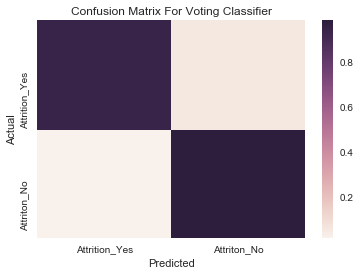

Binary confusion matrix:
Predicted      Attrition_Yes  Attriton_No  __all__
Actual                                            
Attrition_Yes            668           38      706
Attriton_No               35         2259     2294
__all__                  703         2297     3000

Positive = Attriton_No(employee did not leave)
Negative = Attriton_Yes(employee left)

True Positive Rate: 98.4742807323 %
False Positive Rate: 5.38243626062 %
True Negative Rate: 94.6175637394 %
False Negative Rate: 1.52571926765 %


In [163]:
model1 = SVC(C=10000,gamma=1,probability=True)
model2 = KNeighborsClassifier(n_neighbors=1)
model3 = DecisionTreeClassifier(min_samples_leaf=1,min_samples_split=3)
model4 = LogisticRegression()
estimators = [('svm',model1),('knn',model2),('tree',model3),('logreg',model4)]
ensemble = VotingClassifier(estimators,voting='soft')
train_result = cross_val_score(ensemble,X_train,y_train,cv=10)
ensemble.fit(X_train,y_train)
print('Training Accuracy:',train_result.mean()*100,'%')
display_stats(ensemble,'Voting Classifier')

## Bagging with Random Forest Classifier

### Tuning min_samples_leaf and min_samples_split

In [19]:
rf = RandomForestClassifier(n_estimators=20,n_jobs=-1,max_features='sqrt',random_state=42)
param_grid1 = {"min_samples_split": np.arange(2, 11),
              "min_samples_leaf": np.arange(1, 11)}
rf_cv = GridSearchCV(rf,param_grid1,cv=5)
rf_cv.fit(X_train,y_train)
print(rf_cv.best_params_)
print(rf_cv.best_score_)

{'min_samples_leaf': 1, 'min_samples_split': 2}
0.988749062422


### Tuning max_features and max_depth

In [12]:
rf = RandomForestClassifier(n_estimators=20,n_jobs=-1,max_features='sqrt',random_state=42,
                            min_samples_split=2,min_samples_leaf=1)
param_grid2 ={'max_features':['sqrt','log2'],'max_depth':np.arange(9,21)}
rf_cv = GridSearchCV(rf,param_grid2,cv=5)
rf_cv.fit(X_train,y_train)
print(rf_cv.best_params_)
print(rf_cv.best_score_)

{'max_depth': 16, 'max_features': 'sqrt'}
0.988915742979


### Increasing the number of estimators and fitting on hold out set

Training Accuracy: 99.7333111093 %

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Accuracy on unseen hold out set: 98.8333333333 %



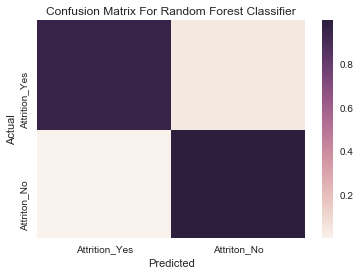

Binary confusion matrix:
Predicted      Attrition_Yes  Attriton_No  __all__
Actual                                            
Attrition_Yes            678           28      706
Attriton_No                7         2287     2294
__all__                  685         2315     3000

Positive = Attriton_No(employee did not leave)
Negative = Attriton_Yes(employee left)

True Positive Rate: 99.6948561465 %
False Positive Rate: 3.96600566572 %
True Negative Rate: 96.0339943343 %
False Negative Rate: 0.305143853531 %


In [164]:
rf = RandomForestClassifier(n_estimators=200,n_jobs=-1,max_features='sqrt',random_state=42,
                            min_samples_split=2,min_samples_leaf=1,max_depth=16)
rf.fit(X_train,y_train)
print('Training Accuracy:',rf.score(X_train,y_train)*100,'%')
display_stats(rf,'Random Forest Classifier')

## Bagging with Extra Trees Classifier

### Tuning min_samples_split and min_samples_leaf

In [8]:
et = ExtraTreesClassifier(n_estimators=40,n_jobs=-1,max_features='sqrt',random_state=42)
param_grid1 = {"min_samples_split": np.arange(2, 11),
              "min_samples_leaf": np.arange(1, 11)}
et_cv = GridSearchCV(et,param_grid1,cv=5)
et_cv.fit(X_train,y_train)
print(et_cv.best_params_)
print(et_cv.best_score_)

{'min_samples_leaf': 1, 'min_samples_split': 3}
0.986498874906


### Tuning max_features and max_depth

In [15]:
et = ExtraTreesClassifier(n_estimators=40,n_jobs=-1,max_features='sqrt',random_state=42,min_samples_leaf=1,
                         min_samples_split=3)
param_grid2 ={'max_features':['sqrt','log2'],'max_depth':np.arange(10,31)}
et_cv = GridSearchCV(et,param_grid2,cv=5)
et_cv.fit(X_train,y_train)
print(et_cv.best_params_)
print(et_cv.best_score_)

{'max_depth': 25, 'max_features': 'sqrt'}
0.986915576298


### Increasing the number of estimators and fitting on hold out set

Training Accuracy: 99.9916659722 %

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Accuracy on unseen hold out set: 98.6666666667 %



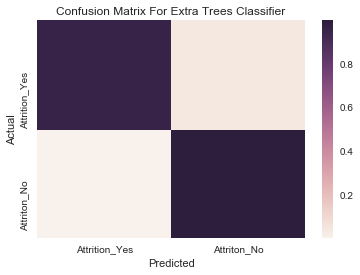

Binary confusion matrix:
Predicted      Attrition_Yes  Attriton_No  __all__
Actual                                            
Attrition_Yes            676           30      706
Attriton_No               10         2284     2294
__all__                  686         2314     3000

Positive = Attriton_No(employee did not leave)
Negative = Attriton_Yes(employee left)

True Positive Rate: 99.5640802092 %
False Positive Rate: 4.2492917847 %
True Negative Rate: 95.7507082153 %
False Negative Rate: 0.435919790759 %


In [166]:
et = ExtraTreesClassifier(n_estimators=200,n_jobs=-1,max_features='sqrt',random_state=42,min_samples_leaf=1,
                         min_samples_split=3,max_depth=25)
et.fit(X_train,y_train)
print('Training Accuracy:',et.score(X_train,y_train)*100,'%')
display_stats(et,'Extra Trees Classifier')

## Boosting with Adaboost on Decision Trees

### Tuning learning_rate and n_estimators

In [45]:
#Boosting 
#Adaboost with decision tree classifier
#Using Decision Trees with optimal min_samples_split and min_samples_leaf already tuned on previous models
tree = DecisionTreeClassifier(min_samples_leaf=1,min_samples_split=3)
adaB = AdaBoostClassifier(base_estimator=tree,random_state=42)
est_range = np.arange(50,250,50)
lr_range = 10. ** np.arange(-3,3)
param_grid = dict(learning_rate=lr_range,n_estimators=est_range)
adaB_cv = GridSearchCV(adaB,param_grid,cv=5)
adaB_cv.fit(X_train,y_train)
print(adaB_cv.best_params_)
print(adaB_cv.best_score_)

{'learning_rate': 1.0, 'n_estimators': 50}
0.989082423535


### Fitting on hold out set

Mean Training Accuracy: 96.4913311803 %

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Accuracy on unseen hold out set: 96.6666666667 %



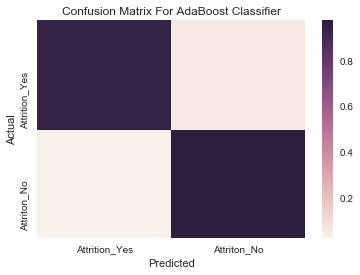

Binary confusion matrix:
Predicted      Attrition_Yes  Attriton_No  __all__
Actual                                            
Attrition_Yes            666           40      706
Attriton_No               60         2234     2294
__all__                  726         2274     3000

Positive = Attriton_No(employee did not leave)
Negative = Attriton_Yes(employee left)

True Positive Rate: 97.3844812554 %
False Positive Rate: 5.6657223796 %
True Negative Rate: 94.3342776204 %
False Negative Rate: 2.61551874455 %


In [169]:
adaB = AdaBoostClassifier(base_estimator=tree,n_estimators=50,learning_rate=1,random_state=42)
adaB.fit(X_train,y_train)
train_result = cross_val_score(adaB,X_train,y_train,cv=10)
print('Mean Training Accuracy:',train_result.mean()*100,'%')
display_stats(adaB,'AdaBoost Classifier')

## Boosting with AdaBoost on Extra Trees

### Tuning learning_rate and n_estimators

In [53]:
#Adaboost extra tree classifier
#Using Extra trees with optimal min_samples_split and min_samples_leaf already tuned on previous models
et = ExtraTreeClassifier(min_samples_leaf=1,min_samples_split=3)
adaB = AdaBoostClassifier(base_estimator=et,random_state=42)
est_range = np.arange(50,250,50)
lr_range = 10. ** np.arange(-3,3)
param_grid = dict(learning_rate=lr_range,n_estimators=est_range)
adaB_cv = GridSearchCV(adaB,param_grid,cv=5)
adaB_cv.fit(X_train,y_train)
print(adaB_cv.best_params_)
print(adaB_cv.best_score_)

{'learning_rate': 0.001, 'n_estimators': 150}
0.987248937411


### Fittting on hold out set

Mean Training Accuracy: 98.8166381597 %

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Accuracy on unseen hold out set: 98.5 %



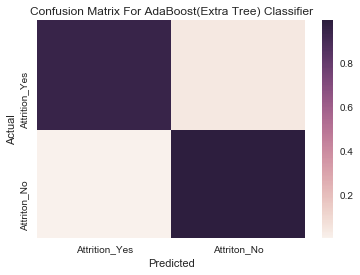

Binary confusion matrix:
Predicted      Attrition_Yes  Attriton_No  __all__
Actual                                            
Attrition_Yes            674           32      706
Attriton_No               13         2281     2294
__all__                  687         2313     3000

Positive = Attriton_No(employee did not leave)
Negative = Attriton_Yes(employee left)

True Positive Rate: 99.433304272 %
False Positive Rate: 4.53257790368 %
True Negative Rate: 95.4674220963 %
False Negative Rate: 0.566695727986 %


In [171]:
adaB_et = AdaBoostClassifier(base_estimator=et,n_estimators=150,learning_rate=0.001,random_state=42)
adaB_et.fit(X_train,y_train)
train_result = cross_val_score(adaB_et,X_train,y_train,cv=10)
print('Mean Training Accuracy:',train_result.mean()*100,'%')
display_stats(adaB_et,'AdaBoost(Extra Tree) Classifier')

## Stochastic Gradient Boosting

### Tuning subsample

In [64]:
#Stochastic Gradient Boosting 
sgb = GradientBoostingClassifier(max_features='sqrt',random_state=42)
subsample_range = np.arange(1,8)/10
param_grid1 = dict(subsample=subsample_range)
sgb_cv = GridSearchCV(sgb,param_grid1,cv=5)
sgb_cv.fit(X_train,y_train)
print(sgb_cv.best_params_)
print(sgb_cv.best_score_)

{'subsample': 0.59999999999999998}
0.975247937328


### Tuning min_samples_leaf and min_samples_split

In [66]:
sgb = GradientBoostingClassifier(max_features='sqrt',random_state=42,subsample=0.6)
param_grid2 = {"min_samples_split": np.arange(2, 11),
              "min_samples_leaf": np.arange(1, 11)}
sgb_cv = GridSearchCV(sgb,param_grid2,cv=5)
sgb_cv.fit(X_train,y_train)
print(sgb_cv.best_params_)
print(sgb_cv.best_score_)

{'min_samples_leaf': 1, 'min_samples_split': 2}
0.975247937328


### Tuning max_depth

In [69]:
sgb = GradientBoostingClassifier(max_features='sqrt',random_state=42,subsample=0.6)
param_grid3 = {"max_depth":np.arange(20,31)}
sgb_cv = GridSearchCV(sgb,param_grid3,cv=5)
sgb_cv.fit(X_train,y_train)
print(sgb_cv.best_params_)
print(sgb_cv.best_score_)

{'max_depth': 20}
0.990165847154


### Tuning learning_rate

In [74]:
sgb = GradientBoostingClassifier(n_estimators=500,max_features='sqrt',random_state=42,min_samples_leaf=1,
                                min_samples_split=2,max_depth=20,subsample=0.6)
lr_range = 10. ** np.arange(-3,1)
param_grid4 = dict(learning_rate=lr_range)
sgb_cv = GridSearchCV(sgb,param_grid4,cv=5)
sgb_cv.fit(X_train,y_train)
print(sgb_cv.best_params_)
print(sgb_cv.best_score_)

{'learning_rate': 0.10000000000000001}
0.990332527711


### Increasing number of estimators and fitting on hold out set

Mean Training Accuracy: 99.0499994213 %

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Accuracy on unseen hold out set: 98.8333333333 %



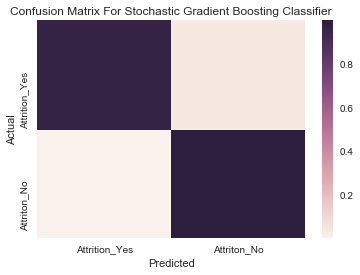

Binary confusion matrix:
Predicted      Attrition_Yes  Attriton_No  __all__
Actual                                            
Attrition_Yes            681           25      706
Attriton_No               10         2284     2294
__all__                  691         2309     3000

Positive = Attriton_No(employee did not leave)
Negative = Attriton_Yes(employee left)

True Positive Rate: 99.5640802092 %
False Positive Rate: 3.54107648725 %
True Negative Rate: 96.4589235127 %
False Negative Rate: 0.435919790759 %


In [11]:
sgb = GradientBoostingClassifier(n_estimators=2000,max_features='sqrt',random_state=42,min_samples_leaf=1,
                                min_samples_split=2,max_depth=20,subsample=0.6,learning_rate=0.1)
sgb.fit(X_train,y_train)
train_result = cross_val_score(sgb,X_train,y_train,cv=10)
print('Mean Training Accuracy:',train_result.mean()*100,'%')
display_stats(sgb,'Stochastic Gradient Boosting Classifier')

### Feature Importance

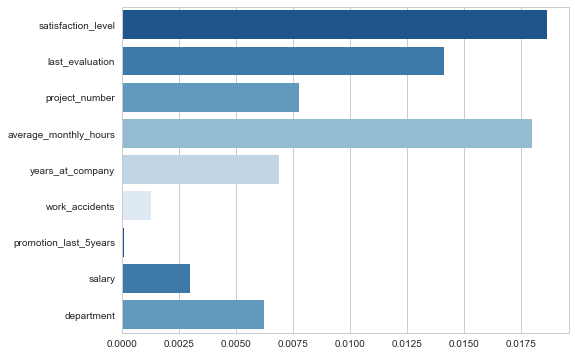

In [60]:
f, ax = plt.subplots(figsize=(8,6))
f_imp = np.append(sgb.feature_importances_[:8],sum(sgb.feature_importances_[8:]))
features = np.array(('satisfaction_level','last_evaluation','project_number','average_monthly_hours',
                        'years_at_company','work_accidents','promotion_last_5years','salary','department'))
sns.barplot(x=f_imp,y=features,palette=sns.color_palette("Blues_r"))
plt.show()